<a href="https://colab.research.google.com/github/sam2377/DL_Medical_Image_Analysis/blob/master/%20MNIST_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST KNN

1. import the necessary packages

In [39]:
# ref: https://customers.pyimagesearch.com/lesson-sample-k-nearest-neighbor-classification/ 
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
import matplotlib.pyplot as plt


2. desplay ramdom images in dataset (10 images)

In [40]:
def display(array1):
    #Displays ten random images from each one of the supplied arrays.
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images = array1[indices, :]
    print(images.shape)
    plt.figure(figsize=(20, 4))

    for i in range(10):
        image = images[i, :, :]
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

3. Use KNN to classify 10 categories

(10, 28, 28)


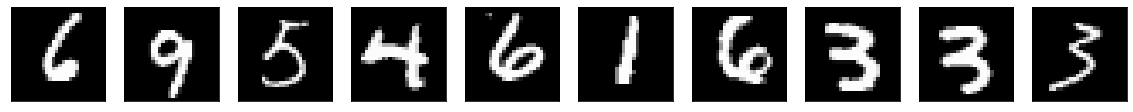

In [41]:
num_classes = 10

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# show dataset
display(x_train)
# set pixels as features => flatten
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_train, y_train)
predicted = model.predict(x_test)



4. Show Accuracy

In [42]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, predicted)
print('accuracy:', accuracy)

accuracy: 0.9655


In [43]:
print(y_train.shape)

(60000, 10)
